In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 100
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [105]:
data = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\new_feat_train.csv', index_col ='match_id_hash')
target = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\train_targets.csv', index_col = 'match_id_hash')
y = target['radiant_win']
y = y.apply(lambda x: int(x)).values
data.head()

,r_kills,r_deaths,r_assists,r_denies,r_gold,r_lh,r_xp,r_max_mana,r_stuns,r_creeps_stacked,...,game_mode_4,game_mode_5,game_mode_12,game_mode_16,game_mode_22,game_mode_23,game_time,lobby_type,objectives_len,chat_len
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,0,1,0,4,2037,25,1991,1490.68891,0.000000,0,...,0,0,0,0,1,0,155,7,1,11
b9c57c450ce74a2af79c9ce96fac144d,16,4,14,28,18172,127,17566,2414.68981,42.060296,2,...,1,0,0,0,0,0,658,0,3,10
6db558535151ea18ca70a6892197db41,0,0,0,0,880,0,0,1670.68912,0.000000,0,...,0,0,0,0,0,1,21,0,0,0
46a0ddce8f7ed2a8d9bd5edcbb925682,6,2,8,43,13348,131,14663,2474.68982,11.397237,0,...,0,0,0,0,1,0,576,7,1,4
b1b35ff97723d9b7ade1c9c3cf48f770,2,4,3,0,8079,62,9762,2364.68977,15.262940,0,...,0,0,0,0,1,0,453,7,1,3


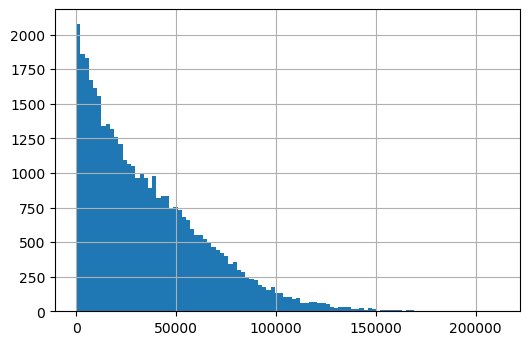

In [81]:
data['r_gold'].hist(bins =100)

In [106]:
# determine the columns of the numerical data for further normalization
numerical = [
    'r_kills','r_deaths', 'r_assists', 'r_denies', 'r_gold', 'r_lh', 'r_xp', 'r_max_mana', 'r_stuns', 'r_creeps_stacked',
    'r_camps_stacked','r_rune_pickups','r_towers_killed', 'r_roshans_killed', 'r_obs_placed','r_sen_placed',
    
    'd_kills','d_deaths', 'd_assists', 'd_denies', 'd_gold', 'd_lh', 'd_xp', 'd_max_mana', 'd_stuns', 'd_creeps_stacked',
    'd_camps_stacked','d_rune_pickups','d_towers_killed', 'd_roshans_killed', 'd_obs_placed', 'd_sen_placed',
    
    'd_dead', 'r_dead', 'd_health_avg', 'r_health_avg',
    'd_avg_level', 'd_min_level', 'd_max_level', 
    'r_avg_level', 'r_min_level', 'r_max_level',
          ]
numerical_columns =[]
for j in range(len(data.columns)):
    if data.columns[j] in numerical:
        numerical_columns.append(j)

In [108]:
from sklearn.model_selection import train_test_split

X = data.values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=25)

In [130]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[:,numerical_columns] = scaler.fit_transform(X_train[:,numerical_columns])
X_test[:,numerical_columns] = scaler.transform(X_test[:,numerical_columns])

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


logreg = LogisticRegression(C = 0.005).fit(X_train,y_train)

score1 = logreg.score(X_test, y_test)
y_pred = logreg.predict_proba(X_test)[:,1]

score2 = roc_auc_score(y_test, y_pred)

print('First baseline:')
print('score', score1)

print('roc_auc', score2)


First baseline:
score 0.7112492648912039
roc_auc 0.7502226674723033
